# Baseball Analytics Exercise

### Brendan Bebb | (248)-231-6223 | bbebb@umich.edu

# Question 1

In [29]:
library(Lahman)
library(dplyr)
library(ggplot2)
library(matrixStats)

**Is there a relationship between a player's on-base percentage (OBP) and their slugging percentage (SLG)? Create a scatter plot to show the relationship between these variables. Does this relationship hold for all players or only certain types of hitters? Explain your findings.**

First, the subset of the Lahman data that takes only the player statistics from 2022 is gathered. Rows without values entered are set to 0.

In [30]:
batting2022 = Lahman::Batting %>% filter(yearID == 2022)
batting2022 = replace(batting2022, is.na(batting2022), 0)
head(batting2022)

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,X2B,⋯,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
,<chr>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,abbotco01,2022,1,WAS,NL,16,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,abramcj01,2022,1,SDN,NL,46,125,16,29,5,⋯,11,1,2,4,27,0,6,2,2,4
3,abramcj01,2022,2,WAS,NL,44,159,17,41,7,⋯,10,6,2,1,23,0,3,0,0,1
4,abreual01,2022,1,TEX,AL,7,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,abreual01,2022,2,KCA,AL,4,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,abreual01,2022,3,NYA,AL,22,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


After observing the dataset, it is refined further to only contain data relevant to the prompt. Below, these columns are removed and players that had multiple stints (traded and played for different teams, etc.) have those rows combined to represent their entire season's statistics.

In [31]:
#remove the stint, team, league columns
batting2022 = batting2022[, -c(2,3, 4, 5)]

#combine player stats for different teams/stints
batting2022 = aggregate(. ~ playerID, data = batting2022, FUN = sum)

# remove other variables not needed
batting2022 = batting2022[,-c(2, 9, 10, 11, 13, 16, 18)]
head(batting2022)

,playerID,AB,R,H,X2B,X3B,HR,BB,IBB,HBP,SF
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,abbotco01,0,0,0,0,0,0,0,0,0,0
2,abramcj01,284,33,70,12,2,2,5,0,9,2
3,abreual01,0,0,0,0,0,0,0,0,0,0
4,abreubr01,0,0,0,0,0,0,0,0,0,0
5,abreujo02,601,85,183,40,0,15,62,2,12,4
6,acevedo01,0,0,0,0,0,0,0,0,0,0


Now that the dataset represents all unique athletes in the 2022 season, columns calculating their on-base percentage and slugging percentage are added.

In [32]:
# OBP:
batting2022$OBP = (batting2022$H + batting2022$BB + batting2022$HBP) / (batting2022$AB + batting2022$BB + batting2022$HBP + batting2022$SF)
# add in a column for singles to help in calculating SLG
batting2022$X1B = batting2022$H - batting2022$X2B - batting2022$X3B - batting2022$HR
# SLG:
batting2022$SLG = (batting2022$X1B + 2*batting2022$X2B + 3*batting2022$X3B + 4*batting2022$HR) / batting2022$AB
# If column is NaN, set it to 0.
batting2022 <- replace(batting2022, is.na(batting2022), 0)

Since there are many players who only had a handful of at-bats, their on base percentage and slugging percentage may be inflated due to such a scarce number of at-bats. To be considered a regular player, only players with over 200 at bats are observed and compared. This new subset includes 346 players.

The scatterplot below illustrates the relationship between a player's on base percentage and slugging percentage, minimum 200 at-bats.

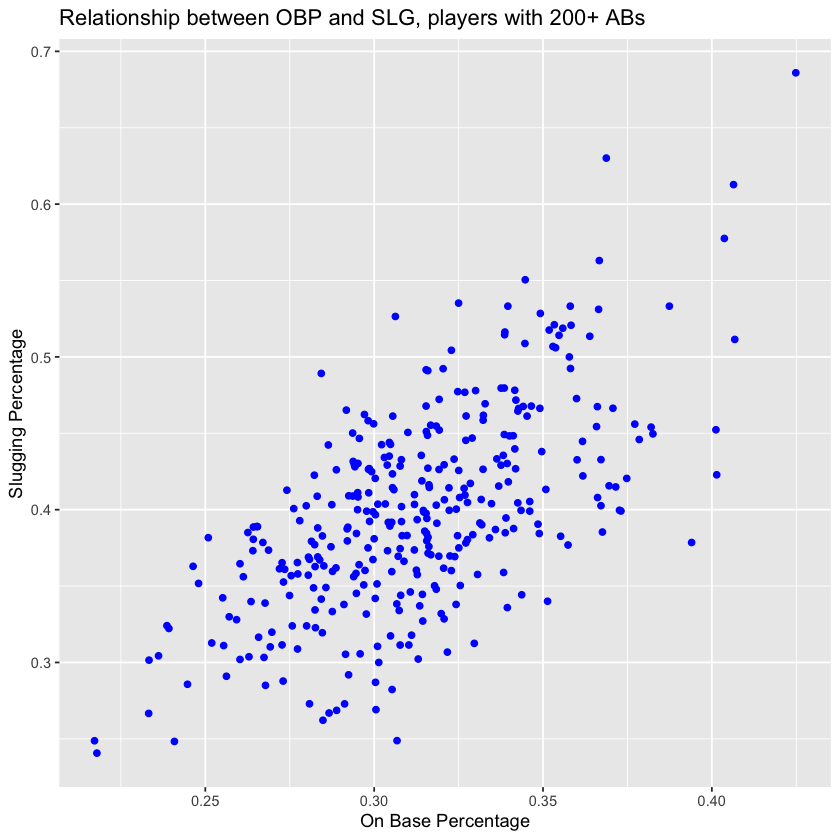

In [35]:
everyday_players = batting2022 %>% filter(AB >= 200)
relation = ggplot(everyday_players, aes(OBP, SLG)) + geom_point(color = 'blue')  + labs(title = "Relationship between OBP and SLG, players with 200+ ABs", x = "On Base Percentage", y = "Slugging Percentage")
relation

As it can be seen in the scatterplot, there is evidence of a positive correlation between a player's on base percentage and slugging percentage. This does not come as a surprise, as players who reach base tend to hit the ball more often, and vice versa.

To evaluate if this relationship is consistent across all types of players, further analysis is required. For this next comparison, players with at least 200 at-bats are broken into two categories: Power hitters and Contact hitters. Among players with at least 200 at-bats, the median number of home runs hit is 12. The average number of home runs (13.39) is not used here, because players like Aaron Judge cause this number to be inflated.

For this part, Power hitters are players with 12 or more home runs (min 200 AB), and Contact hitters are players with 11 or fewer home runs (min 200 AB). There are 174 Power hitters and 172 Contact hitters.

Two scatterplots are created below for Power and Contact hitters.

In [36]:
# separate the hitters into the two respective categories
power_hitters = everyday_players %>% filter(HR >= 12)
contact_hitters = everyday_players %>% filter(HR < 12)

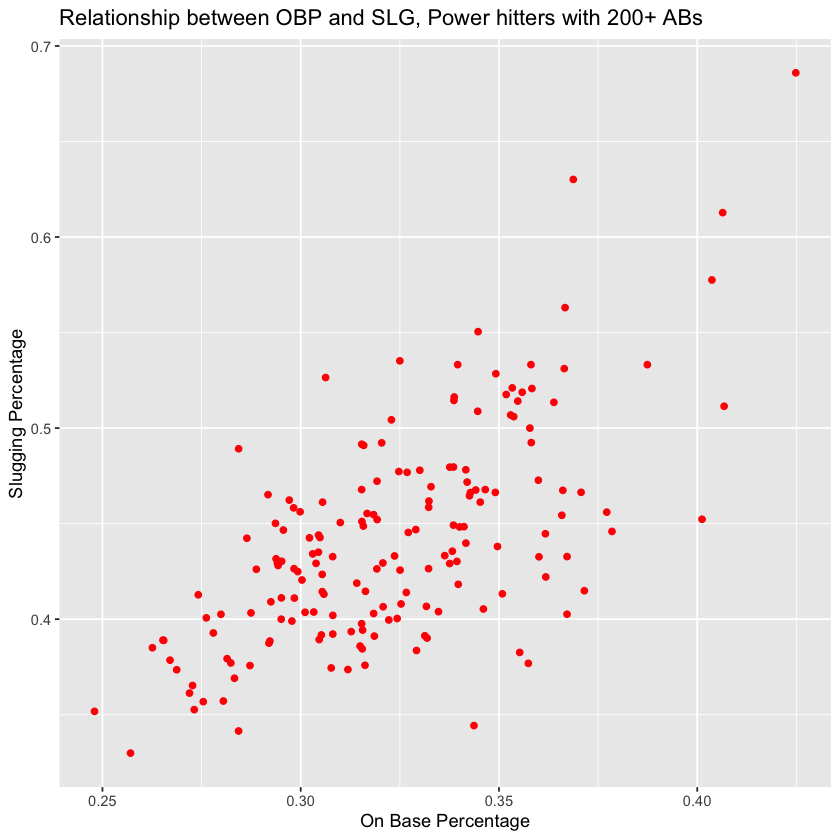

In [37]:
# Power hitters plot
power = ggplot(power_hitters, aes(OBP, SLG)) + geom_point(color = 'red')  + labs(title = "Relationship between OBP and SLG, Power hitters with 200+ ABs", x = "On Base Percentage", y = "Slugging Percentage")
power

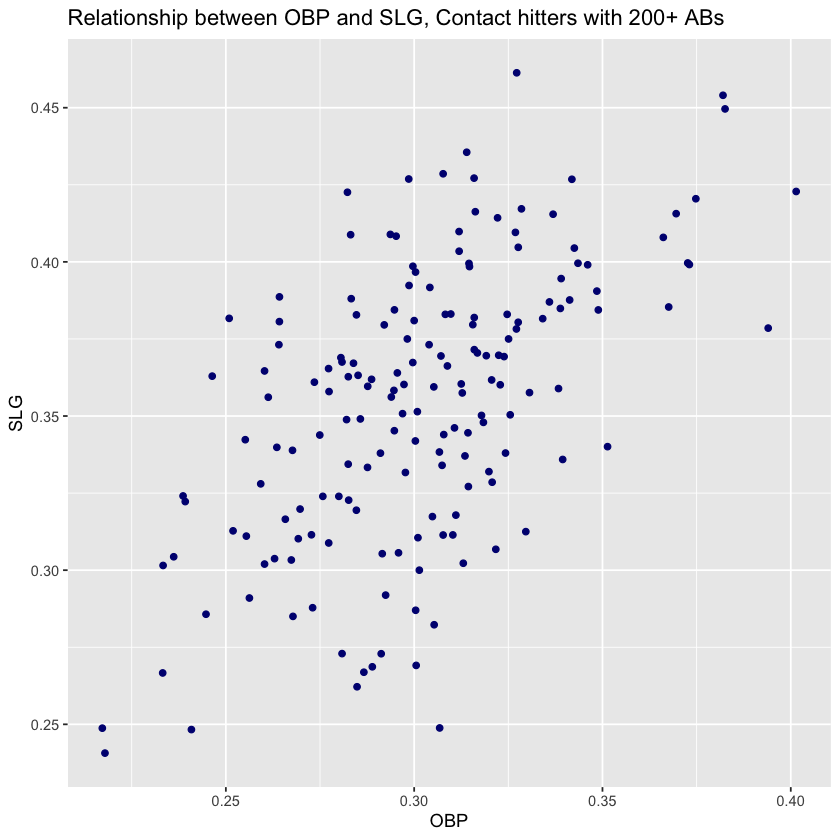

In [38]:
# Contact hitters plot
contact = ggplot(contact_hitters, aes(OBP, SLG)) + geom_point(color = 'navy')  + ggtitle("Relationship between OBP and SLG, Contact hitters with 200+ ABs")
contact

As shown in the scatterplots above, there is still a positive relationship between a player's on base percentage and slugging percentage, regardless of if they have excessive home run power or not.

The only difference between the two categories of hitters is that Power hitters have a higher slugging percentage, but that is expected, as home runs are weighted heavier in the slugging percentage formula. Therefore, it can be concluded that the positive relationship between a player's on base percentage and slugging percentage remains consistent for all types of players.

# Question 2

**Which team had the best offense in the 2022 MLB season? To answer this question, you should consider statistics such as runs scored, batting average, on-base percentage, and slugging percentage. How does the performance of the top team compare to that of the average team?**

To analyze the various offenses in the 2022 season, all the batting statistics for players are combined to represent each team and are evaluated.

In [8]:
teamOffense = Lahman::Batting %>% filter(yearID == 2022)

# remove playerID, yearID, stint, leagueID
teamOffense = teamOffense[, -c(1, 2, 3, 5, 6)]
teamOffense = aggregate(. ~ teamID, data = teamOffense, FUN = sum)

Various statistics are added to the data.

In [49]:
# OBP:
teamOffense$OBP = (teamOffense$H + teamOffense$BB + teamOffense$HBP) / (teamOffense$AB + teamOffense$BB + teamOffense$HBP + teamOffense$SF)
# add in a column for singles to help in calculating SLG
teamOffense$X1B = teamOffense$H - teamOffense$X2B - teamOffense$X3B - teamOffense$HR
# SLG:
teamOffense$SLG = (teamOffense$X1B + 2*teamOffense$X2B + 3*teamOffense$X3B + 4*teamOffense$HR) / teamOffense$AB
# Batting Average:
teamOffense$AVG = teamOffense$H / teamOffense$AB
# If column is NaN, set it to 0.
teamOffense <- replace(teamOffense, is.na(teamOffense), 0)

# sort the teams by total number of runs scored
teamOffense = teamOffense %>% arrange(desc(teamOffense$R))
head(teamOffense)

,teamID,AB,R,H,X2B,X3B,HR,RBI,SB,CS,⋯,SO,IBB,HBP,SH,SF,GIDP,OBP,X1B,SLG,AVG
,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>
1,LAN,5526,847,1418,325,31,212,812,98,18,⋯,1374,22,56,3,53,85,0.3333867,850,0.4417300,0.2566051
2,NYA,5422,807,1308,225,8,254,764,102,33,⋯,1391,36,70,14,41,121,0.3247196,821,0.4262265,0.2412394
3,ATL,5509,789,1394,298,11,243,753,87,31,⋯,1498,13,66,1,36,103,0.3173820,842,0.4434562,0.2530405
4,TOR,5555,775,1464,307,12,200,756,67,35,⋯,1242,13,55,8,33,136,0.3286668,945,0.4311431,0.2635464
5,SLN,5496,772,1386,290,21,197,739,95,25,⋯,1226,11,80,5,45,112,0.3252679,878,0.4201237,0.2521834
6,NYN,5489,772,1422,272,27,171,735,62,22,⋯,1217,25,112,20,44,122,0.3320877,952,0.4119147,0.2590636


Upon initial observation, the Los Angeles Dodgers had one of the most productive offsenses in the 2022 season, scoring 847 runs. In addition to leading Major League Baseball in runs scored, the Dodgers' offense also led the league in RBIs (812) and on base percentage (0.333), while also ranking second in slugging percentage (0.441) behind only the Atlanta Braves (0.443).

The league-leading 111-win Dodgers performed better offensively than many teams in the 2022 season. To further illustrate the offensive threat that the Dodgers posed, the average offensive statistics are calculated for each category for the remaining 29 MLB teams to compare the Dodgers against.

In [54]:
# take the teamID out of the dataset to accurately obtain mean values, as well as the Dodgers' stats
raw = teamOffense[-1,-1]
mean_MLB = data.frame(t(apply(raw, 2, mean)))

# create a table and add the stats of the Dodgers to the "average team"
offense_comparison = data.frame(matrix(nrow = 2, ncol = 21))
offense_comparison[2,c(2:21)] = teamOffense[1,c(2:21)]

# name the new data frame with the same column names
colnames(offense_comparison) = colnames(teamOffense)

# import the average MLB stats to the table
offense_comparison[1,c(2:21)] = mean_MLB

offense_comparison[1,1] = "Average Team"
offense_comparison[2,1] = "LA Dodgers"

# remove irrelevant variables
offense_comparison = offense_comparison[,c(1, 2, 3, 4, 7, 8, 18, 20, 21)]
offense_comparison

teamID,AB,R,H,HR,RBI,OBP,SLG,AVG
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Average Team,5446.172,688.6207,1319.207,172.5172,657.7931,0.3106052,0.3930542,0.2420908
LA Dodgers,5526.000,847.0000,1418.000,212.0000,812.0000,0.3333867,0.4417300,0.2566051


The Dodgers scored 159 more runs than the MLB average (688), while driving in 155 more runs than the league average. This was accompanied by a team batting average 54 points higher than the league average and safely reaching base 2.3% more than the league average. With the offensive prowess of the Dodgers' lineup, it does not come as a surprise that the organization won 68.5% of its regular season games.

# Question 3

**How do defensive shifts affect a team's defensive performance? To answer this question, you should analyze the relationship between the number of shifts a team employs and their defensive statistics, such as fielding percentage and defensive runs saved. Is there a correlation between the number of shifts and defensive performance? Does this vary by team or by position?**

To investigate the impact of defensive shifting on a team's overall defensive performance, data involving the total number of shifts per team must be obtained. This data is taken from Baseball Savant, logged in the accompanying .csv file Shifting2022Savant.csv.

Along with the total number of team shifts, the team total of defensive runs saved for the 2022 season must be obtained. This information is gathered from Fielding Bible, provided in the accompanying .csv file DRS2022.csv.

In [76]:
# filter out the defensive information from the Lahman dataset
defensive2022 = Lahman::Fielding %>% filter(yearID == 2022)
defensive2022 = replace(defensive2022, is.na(defensive2022), 0)

# remove irrelevant data columns from the subset
defensive2022 = defensive2022[, -c(1, 2, 3, 5, 6, 7, 8, 9, 16, 17, 18)]
defensive2022 = aggregate(. ~ teamID, data = defensive2022, FUN = sum)

In [77]:
# import relevant data from both csv files
shifting2022 = read.csv("Shifting2022Savant.csv")
shifting2022 = shifting2022[,c(3, 5)]
DRS2022 = read.csv("DRS2022.csv")

# combine defensive statistics from Lahman and imported csv data
defensive2022 <- merge(defensive2022, shifting2022, by = "teamID", all.x = TRUE)
defensive2022 <- merge(defensive2022, DRS2022, by = "teamID", all.x = TRUE)

Now that the data contains the relevant information needed, team fielding percentage is calculated.

In [78]:
defensive2022$FPCT = (defensive2022$PO + defensive2022$A) / (defensive2022$PO + defensive2022$A + defensive2022$E)
# convert shift numbers to numerical value
defensive2022$Total.Shifts = gsub(",", "", defensive2022$Total.Shifts)
defensive2022$Total.Shifts = as.numeric(defensive2022$Total.Shifts)
head(defensive2022)

,teamID,PO,A,E,DP,PB,WP,Total.Shifts,DRS,FPCT
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,ARI,4290,1370,86,358,13,0,1682,56,0.9850331
2,ATL,4344,1382,77,302,7,0,1774,31,0.9867310
3,BAL,4300,1529,91,416,5,0,1414,36,0.9846284
4,BOS,4293,1447,85,361,6,0,2157,-4,0.9854077
5,CHA,4343,1293,102,310,15,0,2352,-35,0.9822238
6,CHN,4331,1453,96,378,12,0,2307,4,0.9836735


Below are two graphs visualizing the relationship between a team's number of shifts and defensive runs saved (green) and team fielding percentage (orange).

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



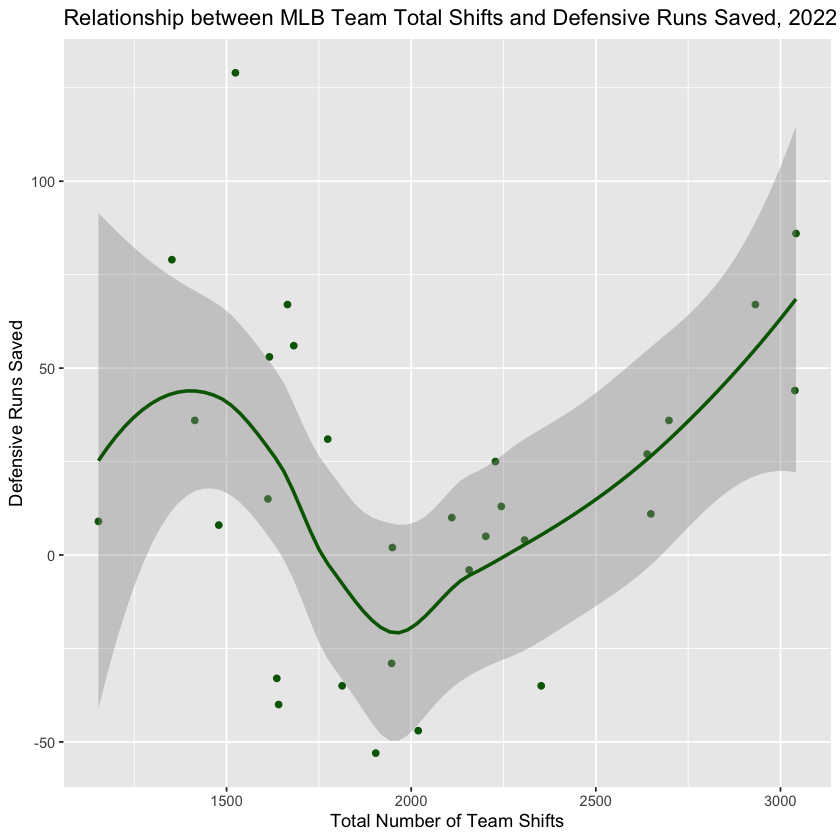

In [79]:
# defensive runs saved graph
ggplot(data = defensive2022, aes(Total.Shifts, DRS)) + geom_point(color = 'darkgreen') + geom_smooth(color = 'darkgreen') + labs(title = "Relationship between MLB Team Total Shifts and Defensive Runs Saved, 2022", x = "Total Number of Team Shifts", y = "Defensive Runs Saved")

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



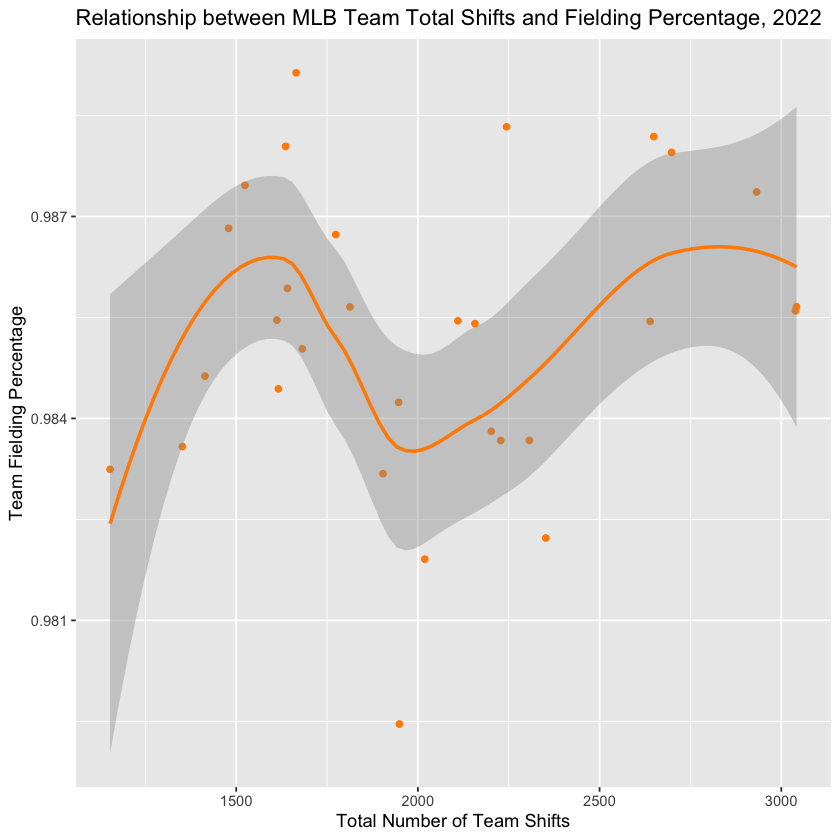

In [80]:
# fielding percentage graph
ggplot(data = defensive2022, aes(Total.Shifts, FPCT)) + geom_point(color = 'darkorange') + geom_smooth(color = 'darkorange') + labs(title = "Relationship between MLB Team Total Shifts and Fielding Percentage, 2022", x = "Total Number of Team Shifts", y = "Team Fielding Percentage")

Overall, it does appear that there is a positive trend between shifting and a team's defensive performance. Teams that shifted the most in the league saved more runs defensively and had a higher fielding percentage than teams that shifted the least. 

However, it is important to note that teams that shifted in an amount similar to the league average did not see as much of an increase in fielding percentage or defensive runs saved. Therefore, unless teams shifted an excessive amount, the difference in defensive performance is negligible.

Next, defensive performance is analyzed by position. The data is manipulated again to group defensive statistics by position.

In [81]:
player_fielding = Lahman::Fielding %>% filter(yearID == 2022)
player_fielding = replace(player_fielding, is.na(player_fielding), 0)

# remove irrelevant data columns and group players by position
player_fielding = player_fielding[,-c(1, 2, 3, 4, 5, 7, 8, 9)]
player_fielding = aggregate(. ~ POS, data = player_fielding, FUN = sum)

# calculate fielding percentage by position
player_fielding$FPCT = (player_fielding$PO + player_fielding$A) / (player_fielding$PO + player_fielding$A + player_fielding$E)

# sort fielding percentages by position
pos_fpct = data.frame(player_fielding[,c(1, 11)])
pos_fpct = pos_fpct %>% arrange(desc(pos_fpct$FPCT))
pos_fpct

POS,FPCT
<chr>,<dbl>
1B,0.9941725
C,0.9930844
OF,0.9880681
2B,0.9829357
SS,0.9725756
3B,0.9641259
P,0.9508040


First basemen had the highest fielding percentage amongst position players, followed closely by catchers. This is expected, as catchers and first basemen have the most chances for putouts in the field, as they are involved in a majority of strikeouts and groundouts.

To compare defensive runs saved by position, another .csv file with individual player data is obtained from Fielding Bible. This is found in the accomnpanying .csv file, which is then combined with data from the Lahman dataset.

In [85]:
# import csv with player DRS
playerDRS = read.csv("playerDRS2022.csv")
player_fielding = Lahman::Fielding %>% filter(yearID == 2022)
player_fielding = replace(player_fielding, is.na(player_fielding), 0)

# the csv identifies players by name, so merge the playerInfo, playerID, and csv datasets
player_fielding = merge(player_fielding, Lahman::People, by = "playerID")
player_fielding = merge(player_fielding, playerDRS, by = c("nameFirst", "nameLast"))

# remove irrelevant data columns and combine data by position
player_fielding = player_fielding[,c(8, 12, 13, 14, 44)]
player_fielding = aggregate(. ~ POS, data = player_fielding, FUN = sum)

# calculate fielding percentage by position
player_fielding$FPCT = (player_fielding$PO + player_fielding$A) / (player_fielding$PO + player_fielding$A + player_fielding$E)
subset = player_fielding[,c(1,2,5, 6)]
subset %>% arrange(desc(subset$DRS))

POS,PO,DRS,FPCT
<chr>,<int>,<int>,<dbl>
SS,5814,57,0.9714652
C,41070,3,0.9931651
2B,8083,-37,0.9829576
OF,29773,-77,0.9880921
3B,3545,-94,0.9640678
P,2341,-132,0.9499760
1B,35958,-154,0.9941514


Aside from catchers, second basemen and shortstops had the most defensive runs saved amongst position players. As the primary players moved around the diamond during shifts, this is not unexpected, and provides evidence that shifting is beneficial for certain positions. 

Below, the number of defensive runs saved and fielding percentage is shown, with the data points representing each position.

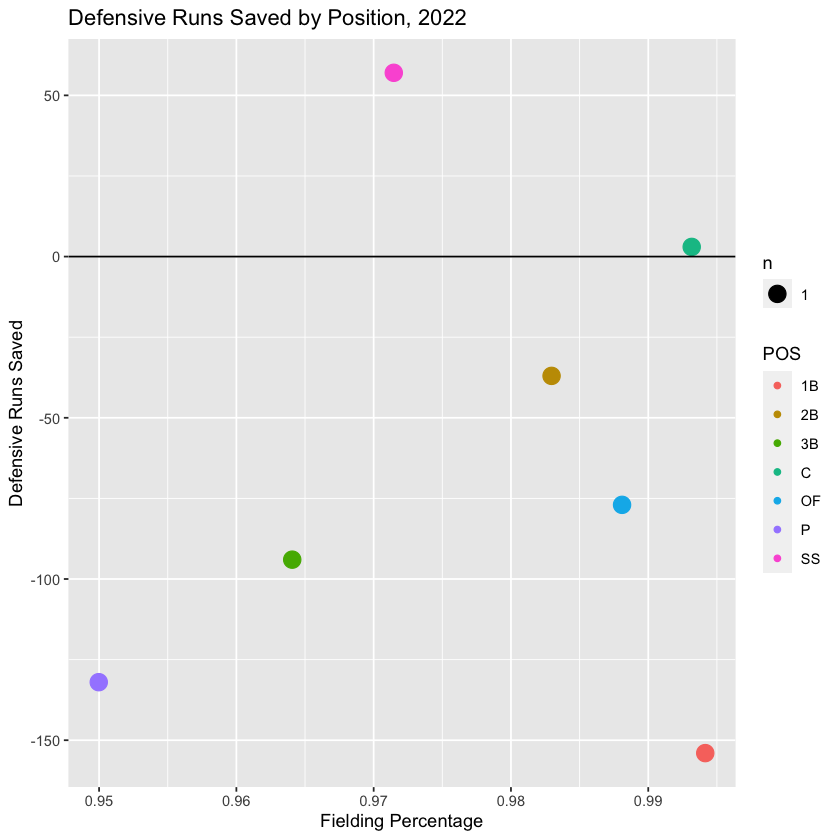

In [86]:
ggplot(player_fielding, aes(FPCT, DRS, color = POS)) + geom_count() + geom_hline(aes(yintercept = 0)) + labs(title = "Defensive Runs Saved by Position, 2022", y = "Defensive Runs Saved", x = "Fielding Percentage")

Unlike the relationship seen at the team level, there is not as much of a positive trend between fielding percentage and defensive runs saved by position. If outfielders, shortstops, and first basemen were removed from the above graph, the relationship would be almost perfectly positively linear. However, that does not capture the true defensive nature of teams, as these points account for five of the nine positions on the diamond.

Therefore, it can be concluded that defensive shifting trends vary more at the team level rather than at the positional level, and excessive shifting does provide an increase in fielding percentage and defensive runs saved.